In [1]:
import numpy as np

%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2 as cv
from matplotlib import pyplot as plt

from supernet_functions.lookup_table_builder import CANDIDATE_BLOCKS
import fbnet_building_blocks.fbnet_modeldef as modeldef

In [2]:
# check sampled architectures list
model_dictionary = modeldef.MODEL_ARCH
print(list(modeldef.MODEL_ARCH.keys()))

model_name = '0817_test_eval_min01_cifar100_95'
# check sampled architecture's structure
architecture = model_dictionary[model_name]['block_op_type']

CANDIDATE_BLOCKS

['fbnet_a', 'fbnet_b', 'fbnet_c', 'fbnet_96_035_1', 'fbnet_samsung_s8', 'fbnet_iphonex', 'fbnet_cpu_sample1', 'fbnet_cpu_sample2', 'mb2_example', 'mb2', 'test1', 'test2', 'test3', 'test4', 'test5', '0526_mb2', 'm2_orig', 'FBNet_DoReFa_w2a2', 'test_200616', 'testo', 'cifar10_ngumbel_600_schedule5_1_flop', 'cifar10_ngumbel_600_schedule5_1', 'cifar10_ngumbel_180_schedule5_1', 'cifar100_ngumbel_180_schedule5_1_flop', 'cifar100_ngumbel_180_schedule5_1', 'test', 'fluctuation_exp_4', 'ngumbel_test', 'test_eval_min01', 'test_eval_min1', 'test_eval2', 'test_eval_300_600', 'test_eval_min01_300_600', 'test_eval_min01_10_600', 'test_config', 'test_exp_min01_180', 'test_exp_min1_180', 'test_exp_min01_600', '0815_test_eval_min01_step_15', '0815_test_eval_min01_step_40', '0815_test_eval_min01_step_70', '0815_test_eval_min01_step_95', '0815_test_eval_min01_step_125', '0815_test_eval_min01_step_150', '0815_test_eval_min01_step_180', '0815_test_eval2_step_15', '0815_test_eval2_step_40', '0815_test_eval2

['ir_k3_e1',
 'ir_k3_s2',
 'ir_k3_e3',
 'ir_k3_e6',
 'ir_k5_e1',
 'ir_k5_s2',
 'ir_k5_e3',
 'ir_k5_e6',
 'skip']

In [3]:
candidate = len(CANDIDATE_BLOCKS)

# width, height 


width = 1700
height = 200
step = 17

one_center_y = int(height / 2)


# box color : blue , green, white
# for matlplot lib
# box_color = [(0, 0, 0.2), (0.8, 0.8, 1.0), (0, 0, 0.8), (0, 0, 0.8), (0, 0.8, 0), (1, 0.8, 1), (0, 0.8, 0), (0, 0.8, 0), (1, 1, 1)]
box_color = [(200, 0, 0), (255, 200, 200), (200, 0, 0), (200, 0, 0), (0, 200, 0), (200, 255, 200), (0, 200, 0), (0, 200, 0), (255, 255, 255)]

# box info : box's height(y), width(x)
box_info = [(140, 16), (140, 16), (140, 40), (140, 64), (180, 16), (180, 16), (180, 40), (180, 64), (80, 16) ]

# stride 2 block
block = [1, 3, 6, 10, 13, 16]
stride = [1, 3, 6,]

one_width = width / step


## drawing phase
# white background
orig_image = np.ones((height, width, 3)) * 255

# vertical line 
img = cv.line(orig_image, (0, one_center_y), (width, one_center_y), (0, 0, 1), 2)

for i in range(step):
    
    one_center_x = int(i * one_width) + int(one_width / 2) 
    
    # dotted horizontal line
    if i in block:
        for j in range(int(height/10)):
            img = cv.line(img, (int(i * one_width), j*10), (int(i * one_width), j*10), (0, 0, 1), 2)
            
    
    layer_candidate_index = CANDIDATE_BLOCKS.index(architecture[i][0])
    
    print((one_center_x - box_info[layer_candidate_index][1]/2 ,one_center_y - box_info[layer_candidate_index][0]/2))
    print(one_center_y + box_info[layer_candidate_index][0]/2)
    
    x1 = int(one_center_x - box_info[layer_candidate_index][1]/2)
    y1 = int(one_center_y - box_info[layer_candidate_index][0]/2)
    x2 = int(one_center_x + box_info[layer_candidate_index][1]/2)
    y2 = int(one_center_y + box_info[layer_candidate_index][0]/2)
    
    if layer_candidate_index == len(CANDIDATE_BLOCKS)-1:
        # for matplotlib
        # img = cv.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 2)
        img = cv.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 2)

    else:
        img = cv.rectangle(img, (x1, y1), (x2, y2), box_color[layer_candidate_index], -1)
        
cv.imwrite(f"./figure/{model_name}.jpg", img)

(18.0, 30.0)
170.0
(118.0, 30.0)
170.0
(218.0, 30.0)
170.0
(318.0, 10.0)
190.0
(418.0, 30.0)
170.0
(518.0, 10.0)
190.0
(618.0, 10.0)
190.0
(718.0, 30.0)
170.0
(818.0, 10.0)
190.0
(918.0, 10.0)
190.0
(1018.0, 30.0)
170.0
(1118.0, 10.0)
190.0
(1218.0, 10.0)
190.0
(1318.0, 30.0)
170.0
(1442.0, 10.0)
190.0
(1542.0, 60.0)
140.0
(1642.0, 60.0)
140.0


True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


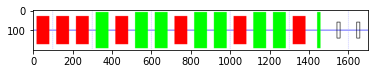

In [4]:
plt.imshow(img)
plt.show()